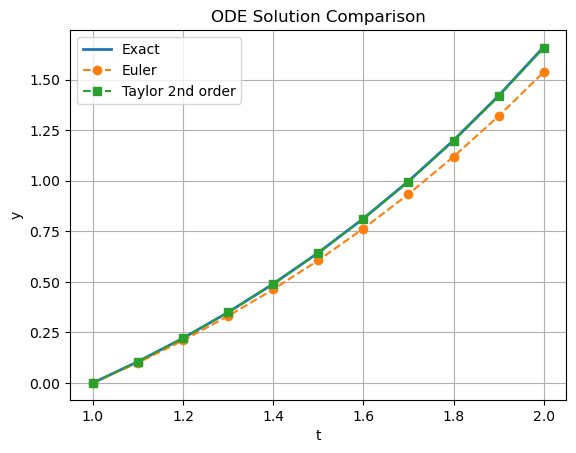

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 精確解
def exact_solution(t):
    return t * np.tan(np.log(t))

# 微分方程 f(t, y)
def f(t, y):
    return 1 + (y/t) + (y/t)**2

# Euler 方法
def euler(f, t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(N):
        y += h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Taylor 方法（二階）
def df_dt(t, y):  # ∂f/∂t
    return -y / t**2 - 2 * y**2 / t**3

def df_dy(t, y):  # ∂f/∂y
    return 1/t + 2*y/(t**2)

def taylor(f, t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(N):
        y_prime = f(t, y)
        y_second = df_dt(t, y) + df_dy(t, y) * y_prime
        y += h * y_prime + (h**2 / 2) * y_second
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# 執行
t0, y0, h = 1.0, 0.0, 0.1
N = int((2 - t0) / h)

t_euler, y_euler = euler(f, t0, y0, h, N)
t_taylor, y_taylor = taylor(f, t0, y0, h, N)
y_true = exact_solution(t_euler)

# 繪圖
plt.plot(t_euler, y_true, label="Exact", linewidth=2)
plt.plot(t_euler, y_euler, 'o--', label="Euler")
plt.plot(t_taylor, y_taylor, 's--', label="Taylor 2nd order")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.title("ODE Solution Comparison")
plt.grid(True)
plt.show()


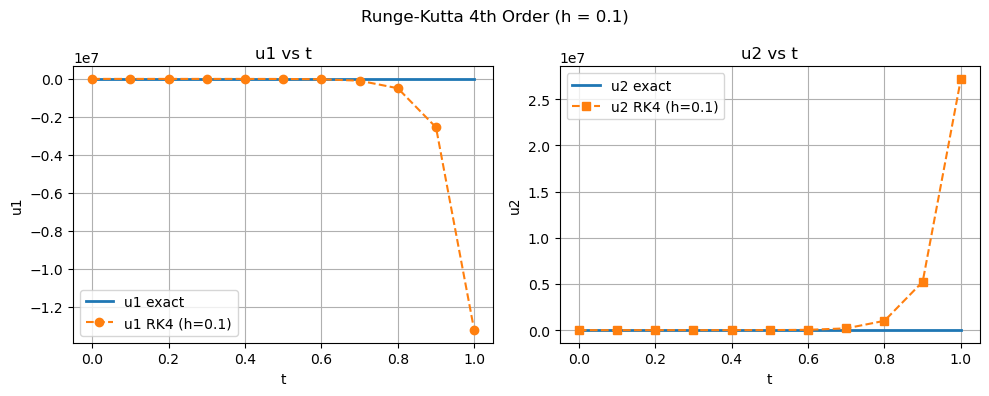

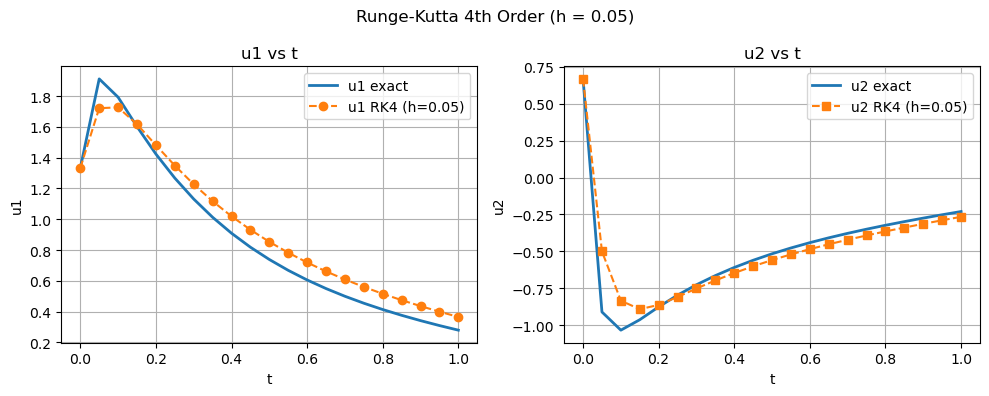

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定義微分方程系統 f(t, u1, u2)
def f1(t, u1, u2):
    return 9*u1 + 24*u2 + 5*np.cos(t) - (1/3)*np.sin(t)

def f2(t, u1, u2):
    return -24*u1 - 52*u2 - 9*np.cos(t) + (1/3)*np.sin(t)

# 精確解
def u1_exact(t):
    return 2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*np.cos(t)

def u2_exact(t):
    return -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*np.cos(t)

# Runge-Kutta 四階方法
def runge_kutta_system(t0, u1_0, u2_0, h, N):
    t_values = [t0]
    u1_values = [u1_0]
    u2_values = [u2_0]
    t = t0
    u1 = u1_0
    u2 = u2_0

    for _ in range(N):
        k1_u1 = h * f1(t, u1, u2)
        k1_u2 = h * f2(t, u1, u2)

        k2_u1 = h * f1(t + h/2, u1 + k1_u1/2, u2 + k1_u2/2)
        k2_u2 = h * f2(t + h/2, u1 + k1_u1/2, u2 + k1_u2/2)

        k3_u1 = h * f1(t + h/2, u1 + k2_u1/2, u2 + k2_u2/2)
        k3_u2 = h * f2(t + h/2, u1 + k2_u1/2, u2 + k2_u2/2)

        k4_u1 = h * f1(t + h, u1 + k3_u1, u2 + k3_u2)
        k4_u2 = h * f2(t + h, u1 + k3_u1, u2 + k3_u2)

        u1 += (k1_u1 + 2*k2_u1 + 2*k3_u1 + k4_u1) / 6
        u2 += (k1_u2 + 2*k2_u2 + 2*k3_u2 + k4_u2) / 6
        t += h

        t_values.append(t)
        u1_values.append(u1)
        u2_values.append(u2)

    return np.array(t_values), np.array(u1_values), np.array(u2_values)

# 初始條件
t0 = 0
u1_0 = 4/3
u2_0 = 2/3
t_end = 1.0

# 嘗試兩種步長
for h in [0.1, 0.05]:
    N = int((t_end - t0) / h)
    t_vals, u1_vals, u2_vals = runge_kutta_system(t0, u1_0, u2_0, h, N)
    u1_true = u1_exact(t_vals)
    u2_true = u2_exact(t_vals)

    # 繪圖
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t_vals, u1_true, label='u1 exact', linewidth=2)
    plt.plot(t_vals, u1_vals, 'o--', label=f'u1 RK4 (h={h})')
    plt.title("u1 vs t")
    plt.xlabel("t")
    plt.ylabel("u1")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_vals, u2_true, label='u2 exact', linewidth=2)
    plt.plot(t_vals, u2_vals, 's--', label=f'u2 RK4 (h={h})')
    plt.title("u2 vs t")
    plt.xlabel("t")
    plt.ylabel("u2")
    plt.legend()
    plt.grid(True)

    plt.suptitle(f"Runge-Kutta 4th Order (h = {h})")
    plt.tight_layout()
    plt.show()
